In [1]:
import numpy as np
from data_pre import *
from Steering import *

In [2]:
data = load_data()

----start loading----
march done.               
april done.               
may done.               
----finish loading----


In [3]:
m = Steering(data)
m.update_vars(m.data)
m.filter_obs()

Done. 67.36 % observations left after filtering (726225 out of 1078126).


In [4]:
m.fit_by_batches(by='equally_spaced', plot_paras=False)

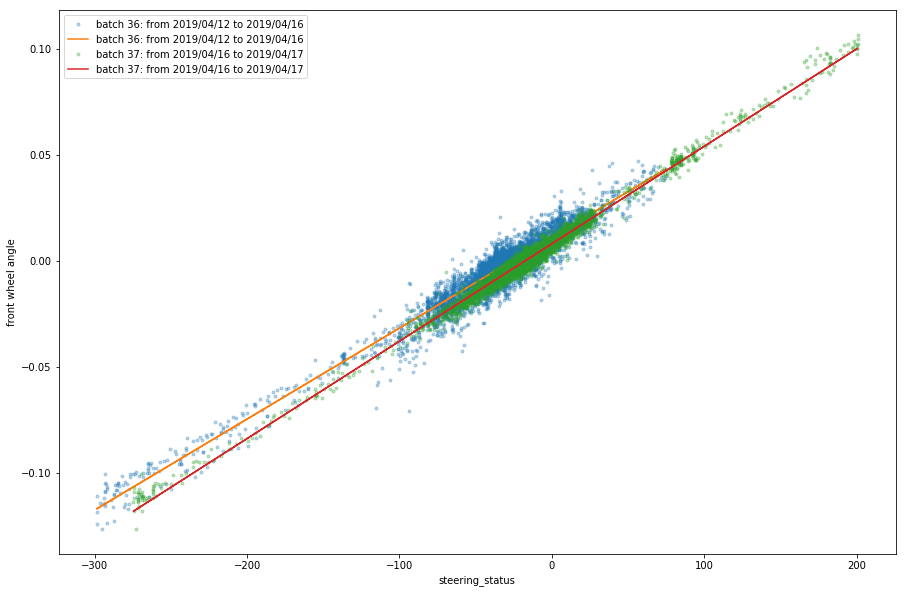

In [5]:
m.plot_batches(36, 37)

,batch,Int_,Coef_,Sig_
8,batch 8: from 2019/03/11 to 2019/03/11,0.011145,0.000436,0.002655
9,batch 9: from 2019/03/11 to 2019/03/11,0.011806,0.000433,0.002836
13,batch 13: from 2019/03/14 to 2019/03/16,0.011537,0.000450,0.003183
20,batch 20: from 2019/03/21 to 2019/03/23,0.010979,0.000438,0.004107
25,batch 25: from 2019/03/27 to 2019/03/29,0.010995,0.000439,0.004291
26,batch 26: from 2019/03/29 to 2019/03/30,0.010878,0.000435,0.003494
28,batch 28: from 2019/03/30 to 2019/04/01,0.010918,0.000425,0.004257
31,batch 31: from 2019/04/04 to 2019/04/06,0.011531,0.000433,0.003965
32,batch 32: from 2019/04/06 to 2019/04/07,0.011702,0.000436,0.004389
33,batch 33: from 2019/04/07 to 2019/04/08,0.011876,0.000436,0.004399


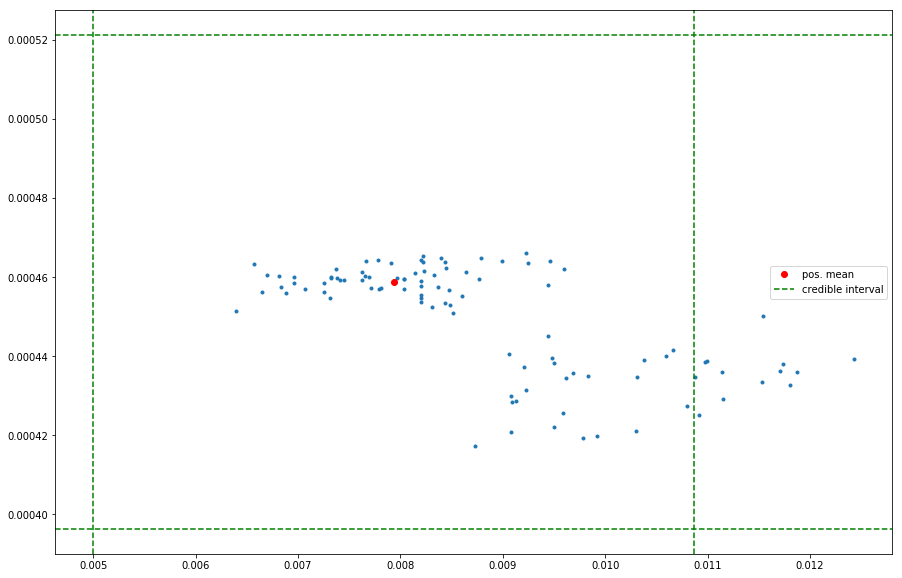

In [6]:
# use the most recent data as our samples for BLR
X = np.c_[np.ones(sum(m.str_time > '2019/04/16')), m.data2[m.str_time > '2019/04/16'].steering_status]
y = m.fwa[m.str_time > '2019/04/16']

m.BLR(X, y, plot_region=False)
m.outliers

,batch,Int_,Coef_,Sig_
5,batch 5: from 2019/03/06 to 2019/03/07,0.010296,0.000421,0.003220
8,batch 8: from 2019/03/11 to 2019/03/11,0.011145,0.000436,0.002655
9,batch 9: from 2019/03/11 to 2019/03/11,0.011806,0.000433,0.002836
13,batch 13: from 2019/03/14 to 2019/03/16,0.011537,0.000450,0.003183
20,batch 20: from 2019/03/21 to 2019/03/23,0.010979,0.000438,0.004107
25,batch 25: from 2019/03/27 to 2019/03/29,0.010995,0.000439,0.004291
26,batch 26: from 2019/03/29 to 2019/03/30,0.010878,0.000435,0.003494
27,batch 27: from 2019/03/30 to 2019/03/30,0.010803,0.000428,0.002543
28,batch 28: from 2019/03/30 to 2019/04/01,0.010918,0.000425,0.004257
31,batch 31: from 2019/04/04 to 2019/04/06,0.011531,0.000433,0.003965


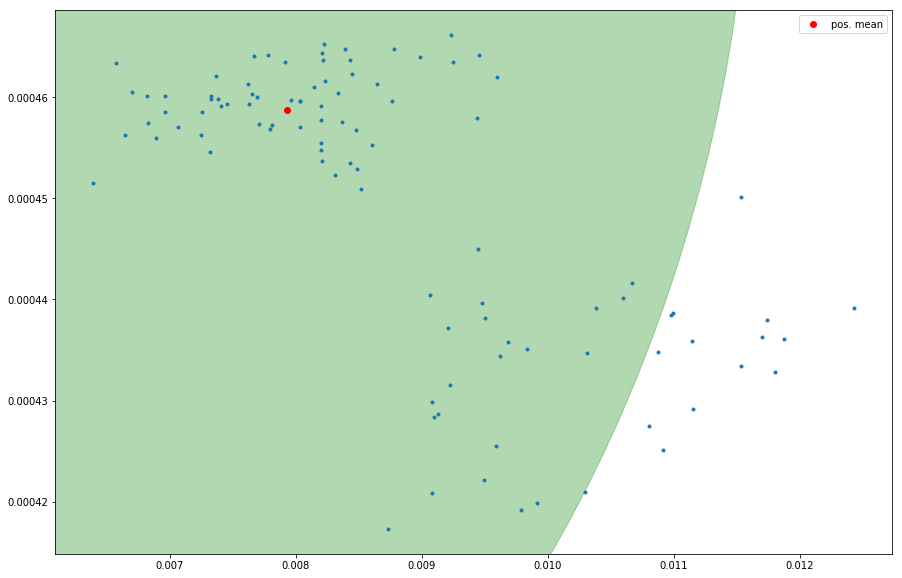

In [7]:
m.BLR(X, y)
m.outliers